In [1]:
# from sklearn.neural_network import MLPRegressor
import numpy as np
# Initial imports
import pandas as pd
from pathlib import Path
# from sklearn.datasets import make_blobs, make_moons
# from sklearn.model_selection import train_test_split
# from sklearn.preprocessing import StandardScaler
# from tensorflow.keras.models import Sequential
# from tensorflow.keras.layers import Dense
import hvplot.pandas
import holoviews as hv
from itertools import islice

%matplotlib inline

read the GMA data with the areas and avg's for each
data contains; Actual sales price from the prio year and the pct change, the transactions from the prior year and the pct change, etc.


In [2]:

# Attempt to load the CSV file using a different encoding
data_csv = pd.read_csv(Path("./GMA_data.csv"))
data_csv = data_csv.drop(columns=['% Change', '% Change.1', 'MOI 11/2022',
       'MOI 11/2023', '% Change.2' , '% Change.3', 'Geo Market Area'])
data_csv.head()
data_csv.head()



,ASP 12/2021 - 12/2022,ASP 12/2022 - 12/2023,Transactions 12/2021 - 12/2022,Transactions 12/2022 - 12/2023,Avg DOM 12/2021 - 12/2022,Avg DOM 12/2022 - 12/2023
0,"$305,022","$319,320",290,205.0,15.0,35.7
1,"$321,283","$331,624",411,245.0,27.6,39.2
2,"$265,879","$258,609",786,613.0,23.3,40.2
3,"$237,692","$237,042",880,755.0,23.2,38.1
4,"$260,950","$262,756",523,443.0,21.8,31.6


In [3]:
data_csv.dtypes

ASP 12/2021 - 12/2022              object
ASP 12/2022 - 12/2023              object
Transactions 12/2021 - 12/2022      int64
Transactions 12/2022 - 12/2023    float64
Avg DOM 12/2021 - 12/2022         float64
Avg DOM 12/2022 - 12/2023         float64
dtype: object

In [4]:
data_csv.columns

Index(['ASP 12/2021 - 12/2022', 'ASP 12/2022 - 12/2023',
       'Transactions 12/2021 - 12/2022', 'Transactions 12/2022 - 12/2023',
       'Avg DOM 12/2021 - 12/2022', 'Avg DOM 12/2022 - 12/2023'],
      dtype='object')

Obtain and read the (general) houston data and retrive head with name of data 
dataset contains ; dollar volume, average price, and median price.

In [5]:
H_data= pd.read_csv(Path("./Houston_data.csv"),skiprows=1)
H_data = H_data.drop(columns=['Property Type','Year Ago.1', 'Year Ago.2','Year Ago.3', 'Price.1'])
H_data.dropna(inplace=True)
H_data.head()                   

,Listings*,Year Ago,Dollar Volume,Price
1,"7,983",-4%,"$3,353,852,000","$420,124"
2,556,-19%,"$145,065,478","$260,909"
3,65,-22%,"$31,514,889","$484,844"
4,244,-10%,"$142,090,041","$582,336"
5,73,30%,"$35,446,505","$485,569"


In [6]:
H_data.columns

Index(['Listings*', 'Year Ago', 'Dollar Volume', 'Price'], dtype='object')

In [7]:
H_data.dtypes

Listings*        object
Year Ago         object
Dollar Volume    object
Price            object
dtype: object

grab the days on market data and make a dataframe for the average DOM

In [8]:
Dom_data = pd.read_csv(Path("./Days_on_market.csv"),skiprows=1)
Dom_data=Dom_data.drop(columns=['Year Ago','Year Ago.1', 'Year Ago.2', 'Listings.1','Listings.2', 'Year Ago.3','Year Ago.4','Property Type','DOM'])
Dom_data.dropna(inplace=True)
Dom_data.head()

,Sqft*,Listings
1,$175,"62,184"
2,$167,"4,559"
3,$171,541
4,$397,"1,932"
5,$310,583


In [9]:
Dom_data.dtypes

Sqft*       object
Listings    object
dtype: object

Grab the Historic data of August: along with the year and year befores data, number of listings, avg/median pricig, and (optional:DOM)
concat the avg and medean pct to the new data frame dataframe, obtain the dtypes

In [10]:
Historic_pricing = pd.read_csv(Path("./Historic_pricing.csv"),skiprows=1)
Historic_pricing= Historic_pricing.drop(columns=['Listings*','Price.1', 'Listings.1', 'Listings.2', 'Orig. List Price','Price','Listings'])
Historic_pricing.dropna(inplace=True)
Historic_pricing.head()
# Historic_pricing.iloc[19:32]
#Historic_pricing = Historic_pricing[Historic_pricing["Month"] == 'Aug'].index
# Historic_pricing['Year'] = Historic_pricing['Year'].astype('Int64')
# Historic_pricing["FullaDate"]= pd.to_datetime(Historic_pricing['Year']+ ''+Historic_pricing["Month"])

# specific_year = 2023
# specific_month = 'Aug'

# filtered_df = Historic_pricing[(Historic_pricing['FullDate'].dt.year == specific_year) & 
#                                (Historic_pricing['FullDate'].dt.month_name() == specific_month)]

,Year,Month,Sqft,DOM
0,2021,Jan,$132,43
1,2021,Feb,$139,42
2,2021,Mar,$143,39
3,2021,Apr,$148,33
4,2021,May,$152,28


Historic_pricing.dtypes

(optional) step: grab and scale data and concat the data values to make a new datframe.

In [11]:
Housing_report = pd.concat([H_data,Dom_data,Historic_pricing],axis=1)
Housing_report=Housing_report.drop(columns=['Sqft*', 'Listings*', 'Month'])
Housing_report.dropna(inplace=True)
# Housing_report.drop(columns=[""])
Housing_report.head()

,Year Ago,Dollar Volume,Price,Listings,Year,Sqft,DOM
1,-4%,"$3,353,852,000","$420,124","62,184",2021,$139,42
2,-19%,"$145,065,478","$260,909","4,559",2021,$143,39
3,-22%,"$31,514,889","$484,844",541,2021,$148,33
4,-10%,"$142,090,041","$582,336","1,932",2021,$152,28
5,30%,"$35,446,505","$485,569",583,2021,$155,24


In [12]:
def convert_percentage_to_float(x):
    if isinstance(x, str):
        return float(x.strip('%')) / 100
    return x

Housing_report['Year Ago'] = Housing_report['Year Ago'].apply(convert_percentage_to_float)
Housing_report['Dollar Volume'] = pd.to_numeric(Housing_report['Dollar Volume'], errors='coerce')
Housing_report['Price'] = pd.to_numeric(Housing_report['Price'], errors='coerce')
Housing_report['Sqft'] = pd.to_numeric(Housing_report['Sqft'], errors='coerce')
Housing_report['Listings'] = pd.to_numeric(Housing_report['Listings'], errors='coerce')

In [13]:
Housing_report.columns

Index(['Year Ago', 'Dollar Volume', 'Price', 'Listings', 'Year', 'Sqft',
       'DOM'],
      dtype='object')

In [14]:
Housing_report.info()

<class 'pandas.core.frame.DataFrame'>
Index: 28 entries, 1 to 30
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Year Ago       28 non-null     float64
 1   Dollar Volume  0 non-null      float64
 2   Price          0 non-null      float64
 3   Listings       13 non-null     float64
 4   Year           28 non-null     int64  
 5   Sqft           0 non-null      float64
 6   DOM            28 non-null     int64  
dtypes: float64(5), int64(2)
memory usage: 1.8 KB


In [15]:
correlation_matrix = Housing_report.corr()

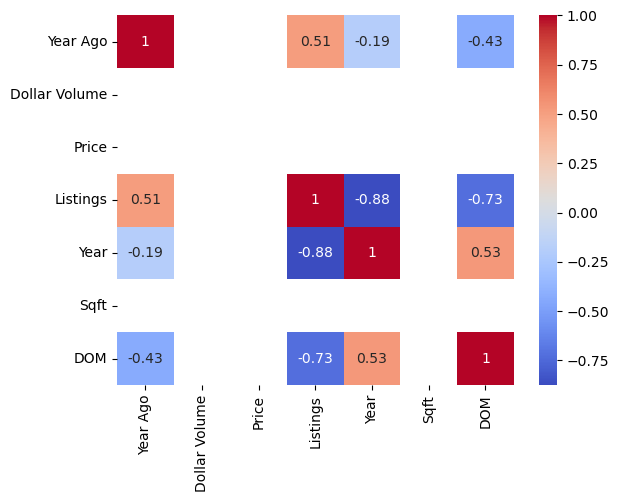

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.show()

In [17]:
from sklearn.datasets import make_blobs, make_moons
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
# # Generate 1000 demo data samples with 2 features and two centers
# X, y = make_blobs(n_samples=1000, centers=4, n_features=2, random_state=78)

In [73]:
X = Housing_report.drop(columns=['Year Ago']).copy()
X.head()


,Dollar Volume,Price,Listings,Year,Sqft,DOM
1,NaN,NaN,NaN,2021,NaN,42
2,NaN,NaN,NaN,2021,NaN,39
3,NaN,NaN,541.0,2021,NaN,33
4,NaN,NaN,NaN,2021,NaN,28
5,NaN,NaN,583.0,2021,NaN,24


In [48]:
y = Housing_report["DOM"]
y[:5]

1    42
2    39
3    33
4    28
5    24
Name: DOM, dtype: int64

In [74]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=78)

In [57]:
X_scaler = StandardScaler()

In [75]:
X_scaler.fit(X_train)

c:\Users\mrjwi\anaconda3\envs\mlenv\lib\site-packages\sklearn\utils\extmath.py:1051: RuntimeWarning: invalid value encountered in divide
  updated_mean = (last_sum + new_sum) / updated_sample_count
c:\Users\mrjwi\anaconda3\envs\mlenv\lib\site-packages\sklearn\utils\extmath.py:1056: RuntimeWarning: invalid value encountered in divide
  T = new_sum / new_sample_count
c:\Users\mrjwi\anaconda3\envs\mlenv\lib\site-packages\sklearn\utils\extmath.py:1076: RuntimeWarning: invalid value encountered in divide
  new_unnormalized_variance -= correction**2 / new_sample_count


StandardScaler()

In [76]:
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [78]:
# Define the the number of inputs to the model
number_inputs = X_train.shape[1]

# Define the number of hidden nodes for the model
number_hidden_nodes = 12

# Create the Sequential model instance
neuron = Sequential([
    Dense(number_hidden_nodes, input_shape=(number_inputs,), activation='relu'),
    Dense(1, activation='linear')  # or another activation function appropriate for your task
])

In [79]:
neuron.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 12)                84        
                                                                 
 dense_3 (Dense)             (None, 1)                 13        
                                                                 
Total params: 97 (388.00 Byte)
Trainable params: 97 (388.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [80]:
neuron.compile(optimizer='adam', loss='mean_squared_error')

In [81]:
model = neuron.fit(X_train_scaled, y_train, epochs=100)

Epoch 1/100
1/1 [==============================] - 0s 345ms/step - loss: 1166.6190
Epoch 2/100
1/1 [==============================] - 0s 0s/step - loss: 1166.5537
Epoch 3/100
1/1 [==============================] - 0s 0s/step - loss: 1166.4882
Epoch 4/100
1/1 [==============================] - 0s 769us/step - loss: 1166.4229
Epoch 5/100
1/1 [==============================] - 0s 0s/step - loss: 1166.3573
Epoch 6/100
1/1 [==============================] - 0s 0s/step - loss: 1166.2920
Epoch 7/100
1/1 [==============================] - 0s 10ms/step - loss: 1166.2264
Epoch 8/100
1/1 [==============================] - 0s 0s/step - loss: 1166.1611
Epoch 9/100
1/1 [==============================] - 0s 0s/step - loss: 1166.0958
Epoch 10/100
1/1 [==============================] - 0s 10ms/step - loss: 1166.0303
Epoch 11/100
1/1 [==============================] - 0s 4ms/step - loss: 1165.9650
Epoch 12/100
1/1 [==============================] - 0s 0s/step - loss: 1165.8994
Epoch 13/100
1/1 [========

In [82]:
model_plot = pd.DataFrame(model.history, index=range(1, len(model.history["loss"]) + 1))

In [83]:
model_plot.head(3)

,loss
1,1166.619019
2,1166.553711
3,1166.488159


<Axes: >

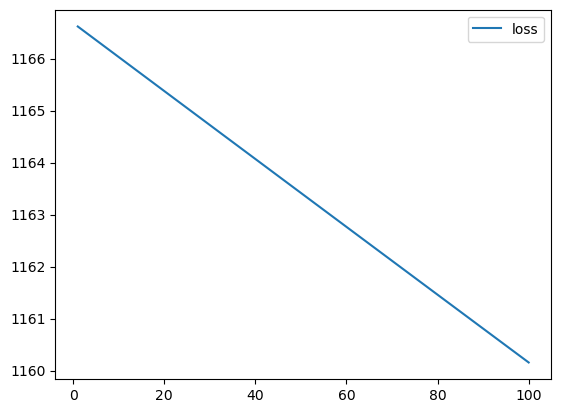

In [84]:
model_plot.plot(y="loss")

In [33]:
# import pandas as pd
# from sklearn.ensemble import RandomForestRegressor
# from sklearn.model_selection import train_test_split
# from sklearn.metrics import mean_squared_error


# Preformance =

Give the User the Option to input a specific area, 
by allowin the user to slice into the concated data; and area data,
Create a If stament for the Geographical area and then populate the model for predictive analysis


In [34]:
# H_data.drop(columns=['Year Ago','Year Ago.1','Year Ago.2','Year Ago.3'])
# # Prompt the user to enter an area name
# user_input_area = input("Enter the name of the area: ")

# # Filter the DataFrame for rows where the 'Geo Market Area' matches the user input
# data_csv = data_csv[data_csv['Geo Market Area'] == user_input_area]

# #allow  a sinput on the prev data  to pull the property type, and sqf
# property_type_input = input("Enter the property type: ")
# sqft_input = input("Enter the square footage: ")
# # Display the filtered data
# print(data_csv)

#create a if statement that call for the avg price for data in a new dataframe

# for index, row in islice(data_csv.iterrows(), 1, None):

#    if index == (number_of_rows):
#         break 
# condition = True 
# if condition:
#     data = {}


In [35]:
# Housing_report.columns
# Housing_report = Housing_report.rename(columns={'Property Type': 'Property Type 1', 'Property Type': 'Property Type 2'})

# # Only convert if the 'Month' column is not already in datetime format
# if not pd.api.types.is_datetime64_any_dtype(Housing_report['Month']):
#     Housing_report['Month'] = pd.to_datetime(Housing_report['Month'].astype(str) + ' 2021')


In [36]:
# # Import hvplot if not already done
# import hvplot.pandas

# # Create the scatter plot
# df_trajectory = Housing_report.hvplot.line(x='DOM', y='Dollar Volume', title='Value of the Housing Market')

# # Display the plot
# df_trajectory


In [37]:
# from prophet import Prophet
# import pandas as pd

# # Assuming your data is in a DataFrame named 'Housing_report'
# # Let's say you want to forecast 'Price' based on 'Date'
# df_trajectory = Housing_report[["Month", "Dollar Volume"]]
# df_trajectory = Housing_report[['Month', 'Dollar Volume']].rename(columns={'Month': 'ds', 'Dollar Volume': 'y'})

# df_trajectory.head()




In [38]:
# model = Prophet()

In [39]:
# model.fit(df_trajectory)


In [40]:
# current_yr_avg
# Property_type
# Dom
# Sqft
# price_change
# Transaction_change


# for index, row in islice(data_csv.iterrows(), 1, None):

#    if index == (number_of_rows):
#         break 
# condition = True 
# if condition:
#     data = {}

In [41]:
# H_data = H_data.rename(columns={0: 'Property ', 1: 'Price', 2: 'Dollar '})

# H_data.reset_index(level=None, drop=False, inplace=False, col_level=3, col_fill=3)
# print(df)
# columns_to_drop = ["Unnamed" , "Sqft*"]
# Dom_data = columns_to_drop("Unnamed")